In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Checking Contents of Google Drive
!ls "/content/gdrive/My Drive/Springboard Projects/Capstone_Three"

Capstone_Three_Modelling_1	  Experiments.csv   group_2  group_5  models
Capstone_Three_Modelling_2	  extracted_images  group_3  group_6
Capstone_Three_Models_Assessment  group_1	    group_4  group_7


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/accuracies_1.csv', index_col=0)
df2 = pd.read_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/accuracies_2.csv', index_col=0)
df = df.append(df2, ignore_index=True)
print(df.head())
df.info()

  architecture model_num    group  ... learning_rate  valid_accuracy  test_accuracy
0       arch_1   model_1  group_1  ...         0.001        0.886139       0.866379
1       arch_1   model_1  group_1  ...         0.010        0.886139       0.852371
2       arch_1   model_1  group_1  ...         0.001        0.876238       0.867457
3       arch_1   model_1  group_1  ...         0.010        0.846535       0.832974
4       arch_1   model_2  group_1  ...         0.001        0.905941       0.855603

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   architecture    308 non-null    object 
 1   model_num       308 non-null    object 
 2   group           308 non-null    object 
 3   optimizer       308 non-null    object 
 4   learning_rate   308 non-null    float64
 5   valid_accuracy  308 non-null    float64
 6   test_

In [6]:
# Finding Best Model for each group
best_model_id = dict()
for group in df['group'].unique():
  id = df[df['group']==group]['valid_accuracy'].argmax()
  best_model_id[group] = id
  print('Best Model for ' + group +' is: ' + df.loc[id]['architecture'] + '_' + df.loc[id]['model_num']
                                          + '_' + df.loc[id]['optimizer'] + '_' + str(df.loc[id]['learning_rate'])
                                          + ' with validation accuracy as ' + str(round(df.loc[id]['valid_accuracy']*100, 2)) + '%'
                                          + ' and test accuracy as ' + str(round(df.loc[id]['test_accuracy']*100, 2)) + '%')

Best Model for group_1 is: arch_3_model_3_SGD_0.01 with validation accuracy as 93.56% and test accuracy as 88.58%
Best Model for group_2 is: arch_3_model_3_SGD_0.001 with validation accuracy as 88.61% and test accuracy as 91.16%
Best Model for group_3 is: arch_3_model_3_Adam_0.001 with validation accuracy as 92.57% and test accuracy as 91.27%
Best Model for group_4 is: arch_3_model_2_Adam_0.001 with validation accuracy as 90.1% and test accuracy as 88.69%
Best Model for group_5 is: arch_3_model_3_SGD_0.01 with validation accuracy as 93.56% and test accuracy as 88.58%
Best Model for group_6 is: arch_3_model_1_Adam_0.001 with validation accuracy as 90.1% and test accuracy as 91.92%
Best Model for group_7 is: arch_3_model_1_Adam_0.001 with validation accuracy as 90.1% and test accuracy as 91.92%


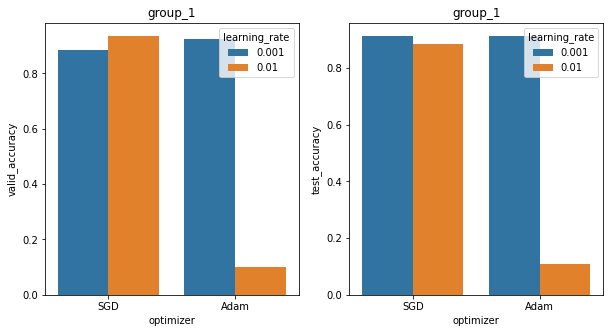

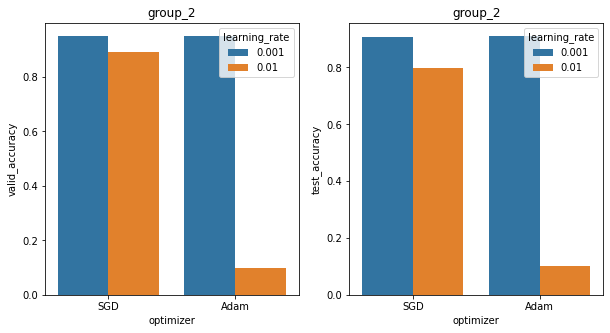

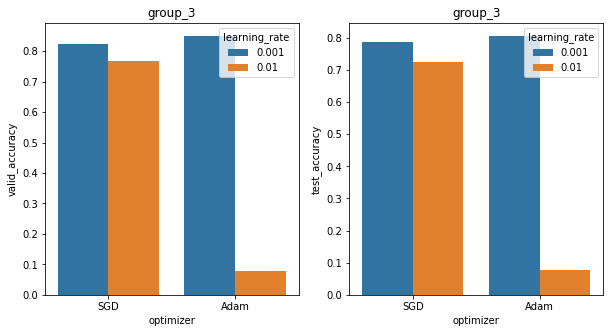

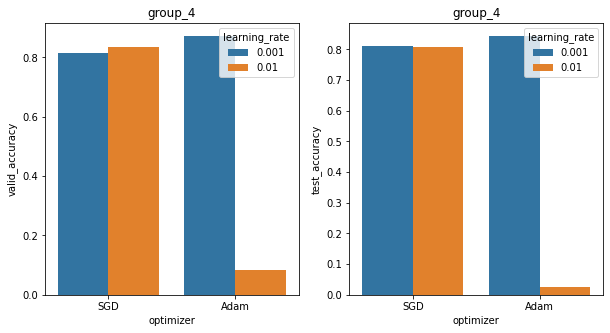

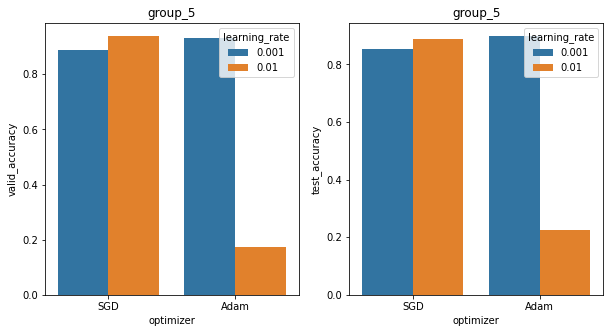

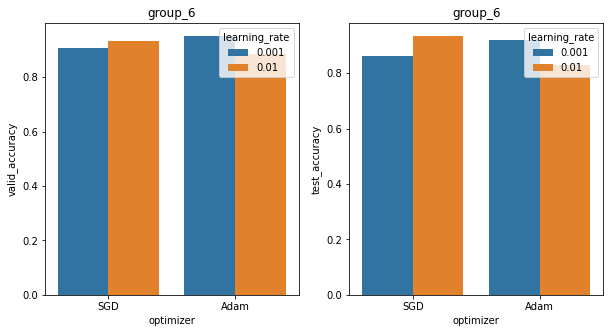

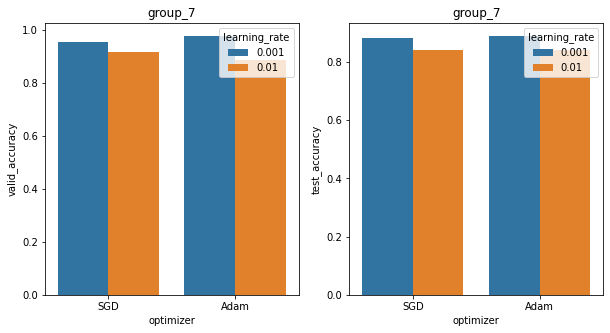

In [7]:
# Lets see how the optimizers and learning rate affect the validation and test accuracy for the best model
for group in df['group'].unique():
  id = best_model_id[group]
  arch = df.loc[id]['architecture']
  modelnum = df.loc[id]['model_num']
  plt.subplots(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.barplot(x='optimizer', y='valid_accuracy', hue='learning_rate', data=df[(df['architecture']==arch)&(df['model_num']==modelnum)&(df['group']==group)])
  plt.title(group)
  plt.subplot(1,2,2)
  sns.barplot(x='optimizer', y='test_accuracy', hue='learning_rate', data=df[(df['architecture']==arch)&(df['model_num']==modelnum)&(df['group']==group)])
  plt.title(group)
  plt.show()

#### It seems that learning rate of 0.01 is not good for Adam optimizer in some cases.

### **Missclassified Images in each Group**

In [8]:
def print_missclassification(test_data, y_pred):
  miss_id = np.where(test_data.classes != y_pred)
  label_dict = dict()
  for k, v in test_data.class_indices.items():
      label_dict[v] = k
  for i in np.random.choice(miss_id[0], size=5, replace=False):
    image = plt.imread(test_data.directory + '/' + test_data.filenames[i])
    plt.subplots(figsize=(2,2))
    plt.imshow(image, cmap='gray')
    plt.show()
    print('Actual Sumbol: ' + label_dict[test_data.classes[i]])
    print('Predicted Symbol: ' + label_dict[y_pred[i]])

Found 928 images belonging to 11 classes.
arch_3_model_3_opt_SGD_lr_0.01_group_1
29/29 [==============================] - 2s 72ms/step - loss: 0.5499 - accuracy: 0.8858


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


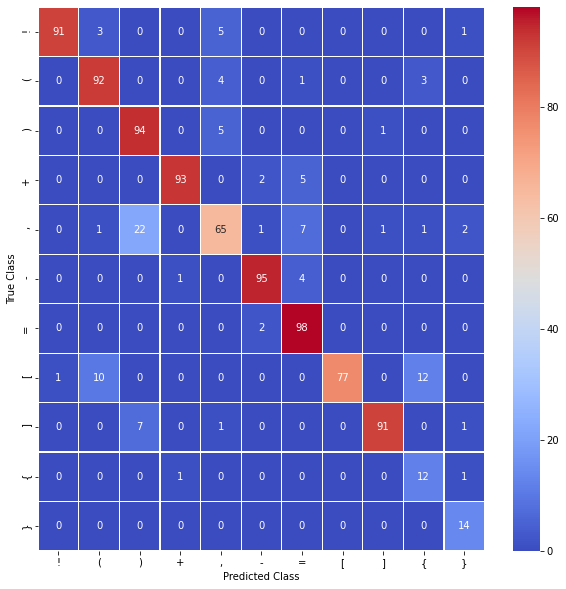

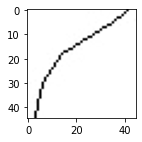

Actual Sumbol: ,
Predicted Symbol: =


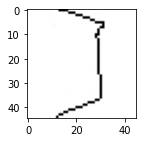

Actual Sumbol: ]
Predicted Symbol: )


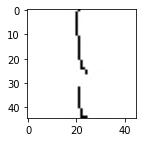

Actual Sumbol: !
Predicted Symbol: ,


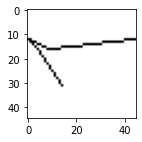

Actual Sumbol: ,
Predicted Symbol: =


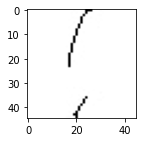

Actual Sumbol: !
Predicted Symbol: (
Found 1000 images belonging to 10 classes.
arch_3_model_3_opt_SGD_lr_0.001_group_2
32/32 [==============================] - 245s 8s/step - loss: 0.3130 - accuracy: 0.9060


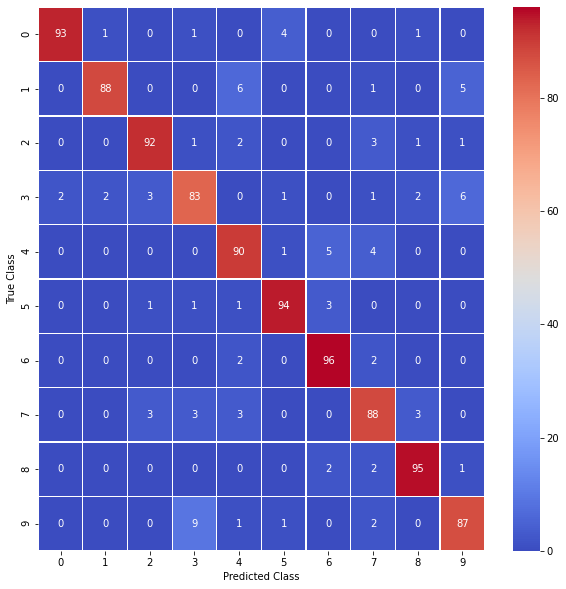

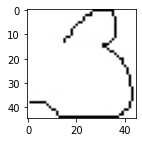

Actual Sumbol: 3
Predicted Symbol: 9


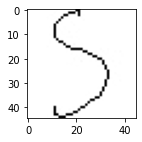

Actual Sumbol: 9
Predicted Symbol: 5


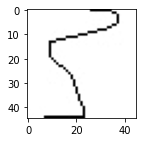

Actual Sumbol: 3
Predicted Symbol: 5


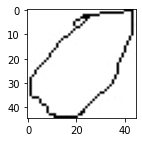

Actual Sumbol: 0
Predicted Symbol: 5


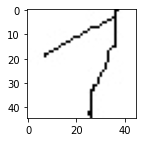

Actual Sumbol: 1
Predicted Symbol: 4
Found 1300 images belonging to 13 classes.
arch_3_model_3_opt_Adam_lr_0.001_group_3
41/41 [==============================] - 298s 7s/step - loss: 0.6833 - accuracy: 0.8062


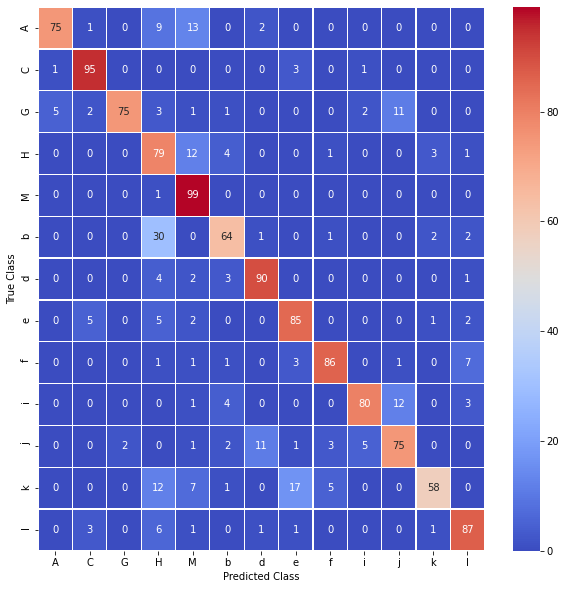

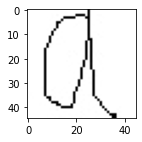

Actual Sumbol: A
Predicted Symbol: d


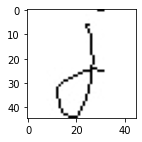

Actual Sumbol: j
Predicted Symbol: d


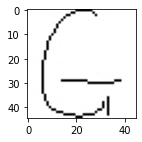

Actual Sumbol: G
Predicted Symbol: C


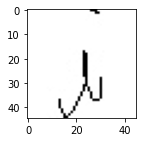

Actual Sumbol: i
Predicted Symbol: j


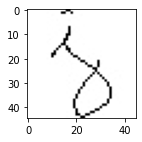

Actual Sumbol: j
Predicted Symbol: b
Found 1151 images belonging to 13 classes.
arch_3_model_2_opt_Adam_lr_0.001_group_4
36/36 [==============================] - 281s 8s/step - loss: 0.6337 - accuracy: 0.8436


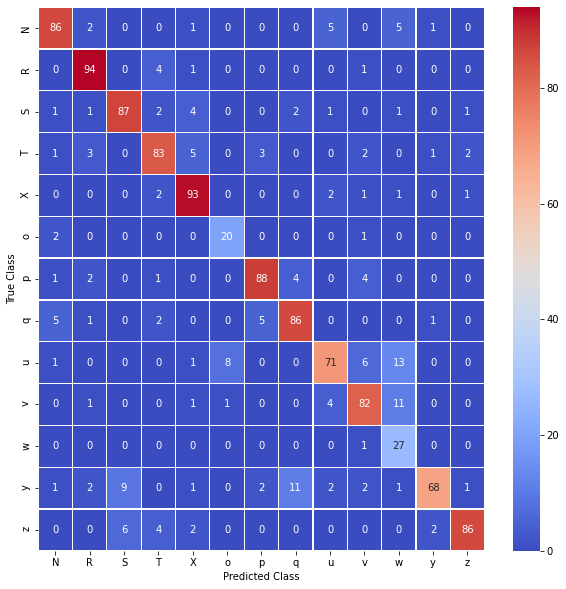

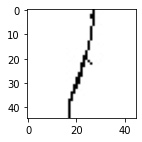

Actual Sumbol: T
Predicted Symbol: v


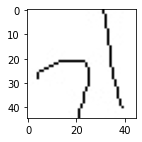

Actual Sumbol: X
Predicted Symbol: u


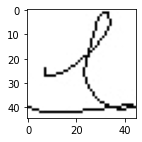

Actual Sumbol: S
Predicted Symbol: X


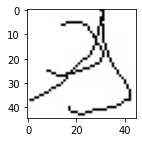

Actual Sumbol: S
Predicted Symbol: z


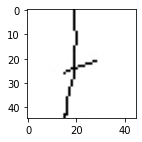

Actual Sumbol: T
Predicted Symbol: v
Found 446 images belonging to 7 classes.
arch_3_model_3_opt_SGD_lr_0.01_group_5
14/14 [==============================] - 101s 8s/step - loss: 0.3897 - accuracy: 0.8879


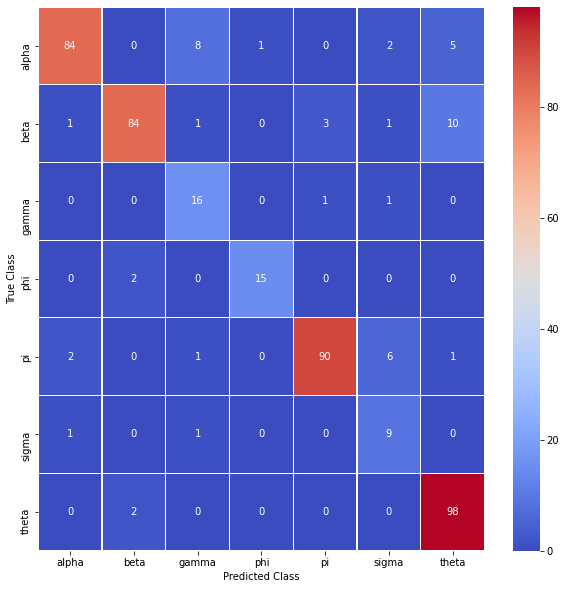

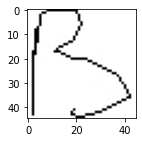

Actual Sumbol: beta
Predicted Symbol: theta


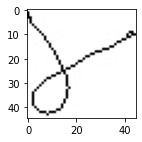

Actual Sumbol: gamma
Predicted Symbol: sigma


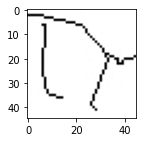

Actual Sumbol: pi
Predicted Symbol: theta


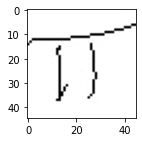

Actual Sumbol: pi
Predicted Symbol: sigma


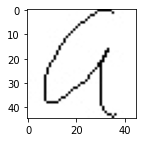

Actual Sumbol: alpha
Predicted Symbol: theta
Found 919 images belonging to 15 classes.
arch_3_model_1_opt_Adam_lr_0.001_group_6
29/29 [==============================] - 226s 8s/step - loss: 0.3357 - accuracy: 0.9195


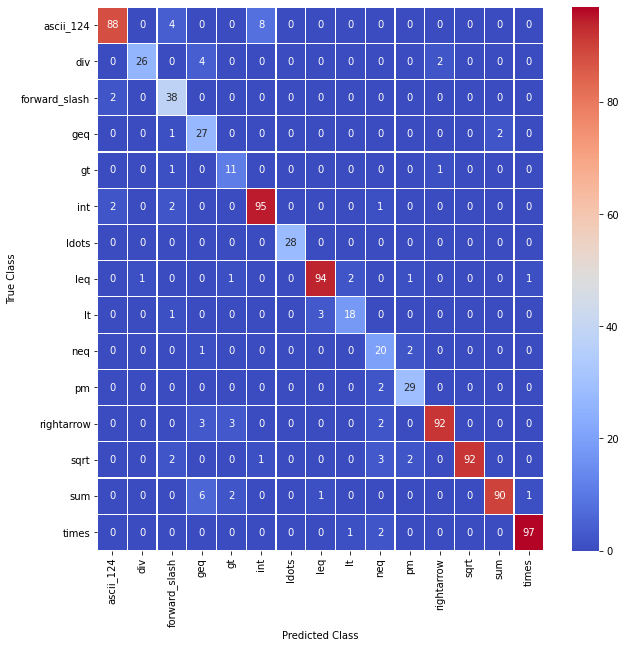

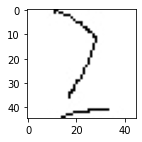

Actual Sumbol: geq
Predicted Symbol: forward_slash


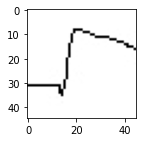

Actual Sumbol: sqrt
Predicted Symbol: pm


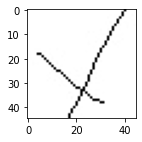

Actual Sumbol: times
Predicted Symbol: neq


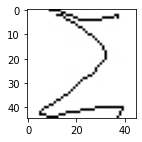

Actual Sumbol: sum
Predicted Symbol: geq


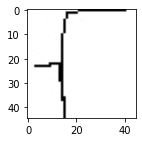

Actual Sumbol: sqrt
Predicted Symbol: pm
Found 616 images belonging to 7 classes.
arch_3_model_1_opt_Adam_lr_0.001_group_7
20/20 [==============================] - 145s 8s/step - loss: 0.3728 - accuracy: 0.8896


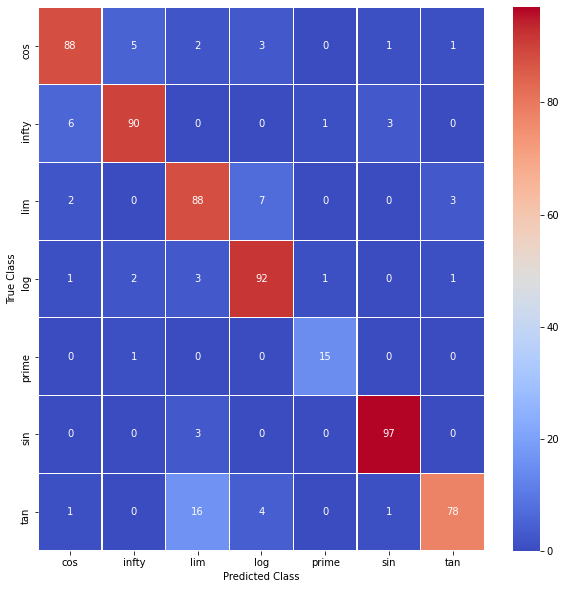

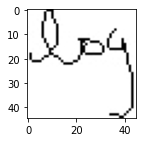

Actual Sumbol: log
Predicted Symbol: infty


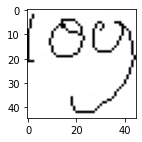

Actual Sumbol: log
Predicted Symbol: infty


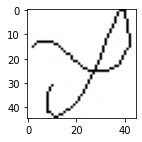

Actual Sumbol: infty
Predicted Symbol: cos


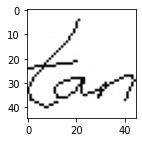

Actual Sumbol: tan
Predicted Symbol: lim


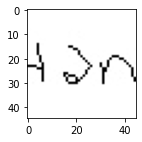

Actual Sumbol: tan
Predicted Symbol: lim


In [ ]:
for group in df['group'].unique():
  id = best_model_id[group]
  tf.keras.backend.clear_session()
  model = tf.keras.models.load_model('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/'+df.loc[id]['architecture'] + '_' + df.loc[id]['model_num']
                                          + '_opt_' + df.loc[id]['optimizer'] + '_lr_' + str(df.loc[id]['learning_rate']) + '_' + group + '.hf5')
  test_img_data_gen = ImageDataGenerator(rescale=1/255)
  test_data = test_img_data_gen.flow_from_directory(('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/'+group+'/test'), 
                                                    target_size=(45,45),
                                                    color_mode='grayscale', 
                                                    batch_size=32,  
                                                    class_mode='categorical', shuffle=False)
  print(df.loc[id]['architecture'] + '_' + df.loc[id]['model_num'] + '_opt_' + df.loc[id]['optimizer'] + '_lr_' + str(df.loc[id]['learning_rate']) + '_' + group)
  model.evaluate(test_data)
  y_pred = model.predict_classes(test_data)
  _ = plt.subplots(figsize= (10,10))
  _ = sns.heatmap(confusion_matrix(test_data.classes, y_pred), 
            annot=True, fmt='d', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices, cmap='coolwarm', linewidths=0.2)
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  plt.show()
  print_missclassification(test_data, y_pred)

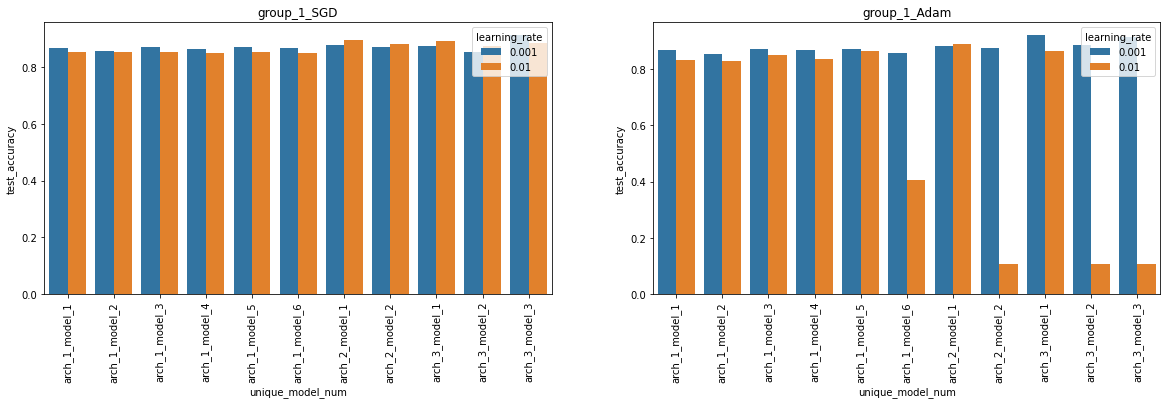

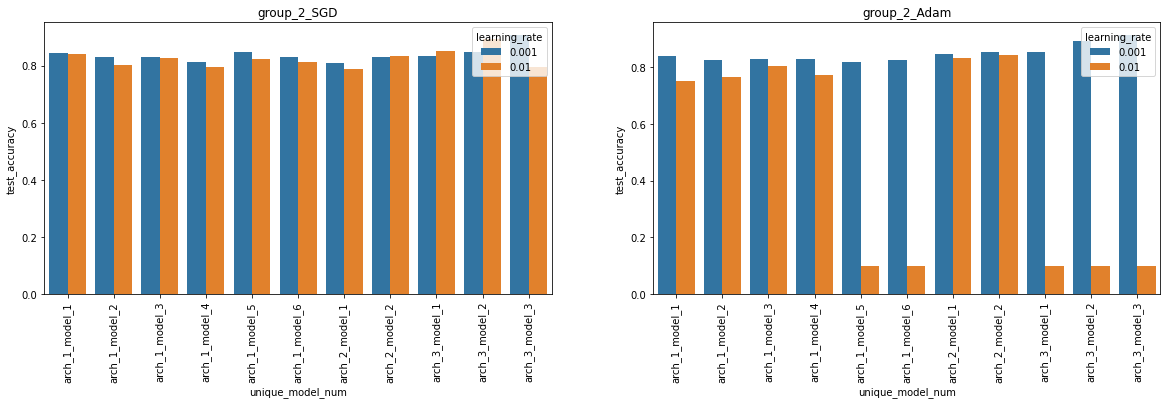

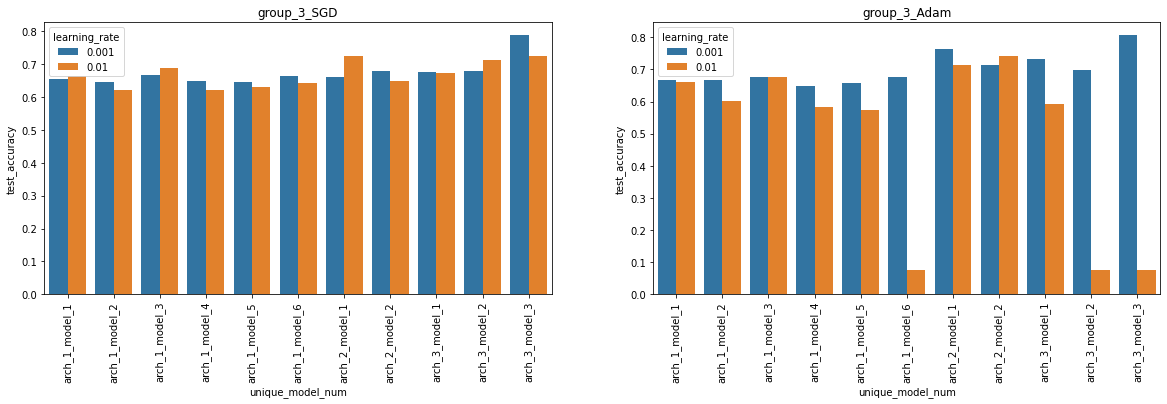

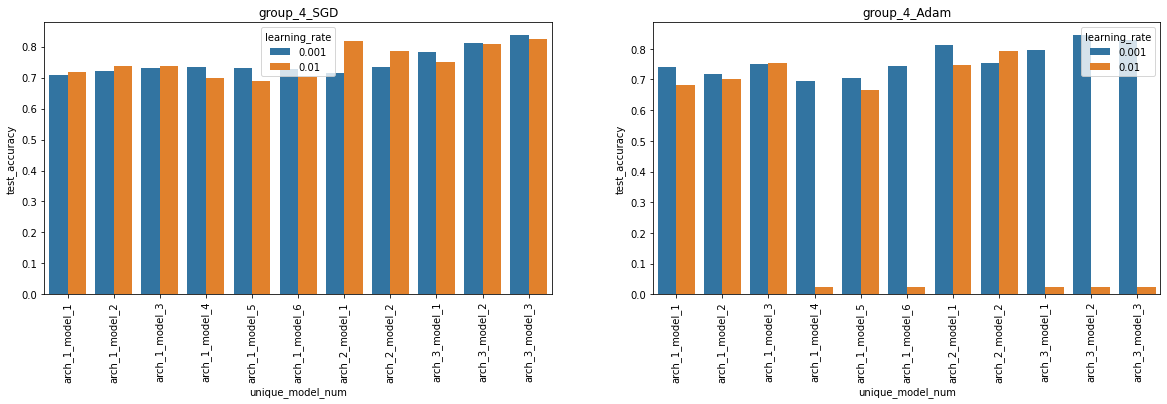

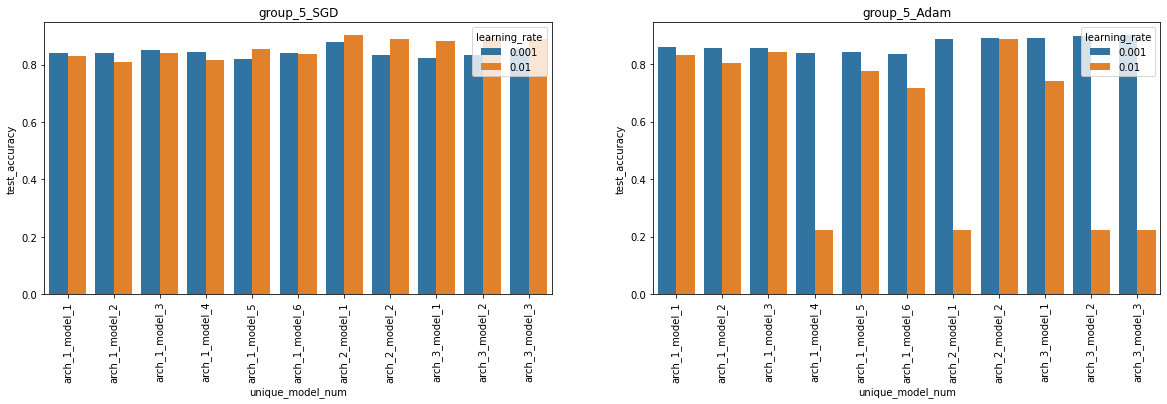

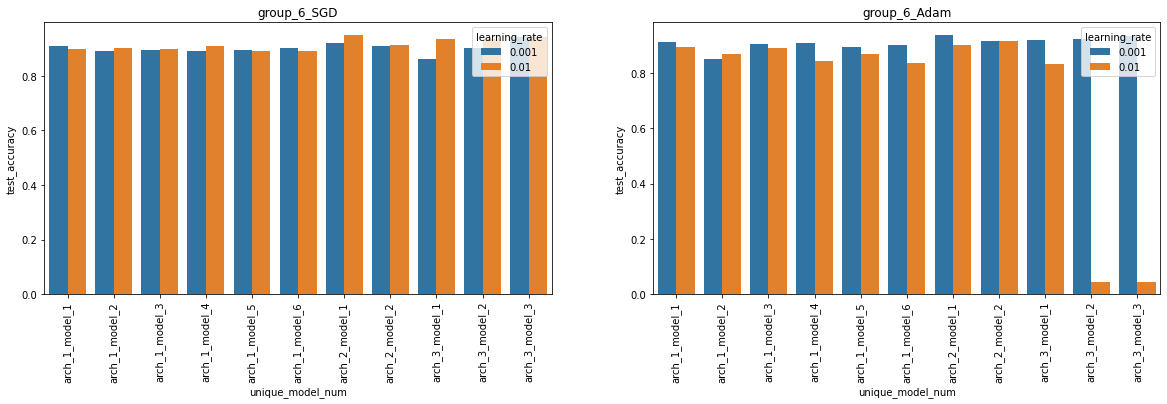

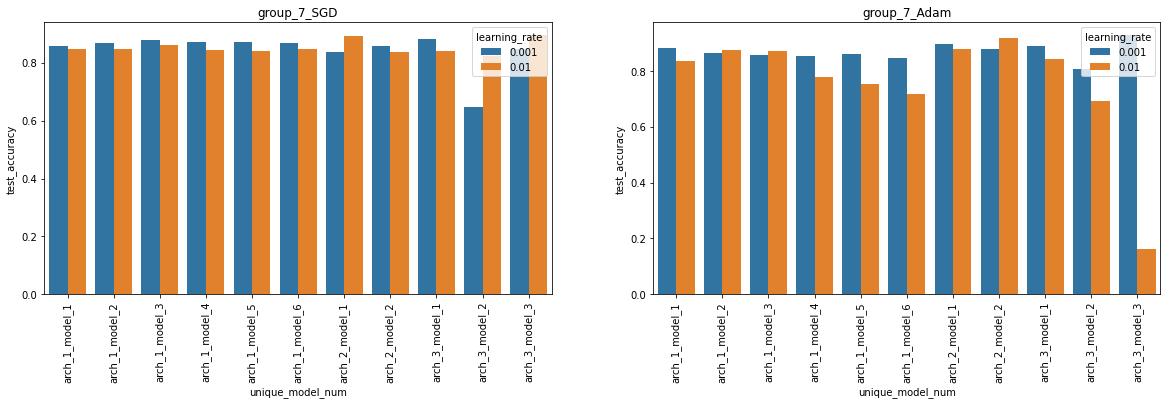

In [18]:
df['unique_model_num'] = df['architecture'] + '_' + df['model_num']
for group in df['group'].unique():
  plt.subplots(figsize=(20,5))
  plt.subplot(1,2,1)
  graph = sns.barplot(x= 'unique_model_num', y='test_accuracy', hue='learning_rate', data=df[(df['group']==group)&(df['optimizer']=='SGD')])
  plt.title(group + '_SGD')
  for item in graph.get_xticklabels():
    item.set_rotation(90)
  plt.subplot(1,2,2)
  graph = sns.barplot(x='unique_model_num', y='test_accuracy', hue='learning_rate', data=df[(df['group']==group)&(df['optimizer']=='Adam')])
  plt.title(group + '_Adam')
  for item in graph.get_xticklabels():
    item.set_rotation(90)
  plt.show()

1. If we compare model_1 and model_2 of arch_1, where only padding has been changed, the accuracies seems comparable to each other.
2. Comparing model_2 and model_3 and model_4indicates that model does not show any significant imporvement while changing stride or kernel size.
3. In all the groups arch_3 is the best architecture which is a deeper architecture and has been inspired from LeNet modified for 10 layers by Nazemi et. al. (2019) (arXiv:1910.07395v1)